# Problem Statement:

## How good is player X against CSK in Chennai. & Check Shivam Dube's stats as middle 

## Order batter and compare it with EX CSK players



Middle overs are one of crucial overs while playing at chennai and CSK key mantra of winning matches at Chepauk is driving game at middle over

Shivam Dube was one the key player of CSK in IPL 2023 who has only job to counterr attack spin in middle over. he has always been X factor for CSK in IPL 2023

Observation says CSK get control of the inning at middle phase of the match while both batting and bowling at chepauk. let's see how numbers proves the same.

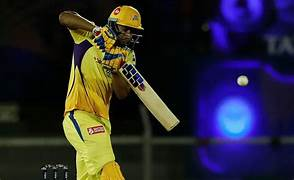

Let's see which are those other players who are good at Chennai in Middle over phase 

1) While playing against CSK


2) CSK Batters approach while playing in middle phase of the innings

## Import the libraries

In [563]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt

Read CSV

In [564]:
deliveries = pd.read_csv('deliveries_updated_mens_ipl.csv')
matches = pd.read_csv('matches_updated_mens_ipl.csv')

In [565]:
mdf=matches.copy()

In [566]:
mdf.head(1)

,venue,umpire2,winner_runs,date,method,reserve_umpire,winner,city,balls_per_over,outcome,match_number,match_referee,team1,eliminator,date1,gender,team2,winner_wickets,toss_winner,toss_decision,date2,tv_umpire,season,umpire1,event,neutralvenue,player_of_match,matchId
0,M Chinnaswamy Stadium,RE Koertzen,140.0,2008-04-18,NaN,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,NaN,1.0,J Srinath,Royal Challengers Bangalore,NaN,NaN,male,Kolkata Knight Riders,NaN,Royal Challengers Bangalore,field,NaN,AM Saheba,2007/08,Asad Rauf,Indian Premier League,NaN,BB McCullum,335982


In [567]:
mdf= mdf.rename(columns={'matchId':"match_id"})

In [568]:
deliveries= deliveries.rename(columns={'matchId':"match_id"})

Merge Delieveries and Matches Dataset

In [569]:
comb= pd.merge(deliveries,mdf,on="match_id", how="left")

In [570]:
comb

,match_id,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date_x,venue,umpire2,winner_runs,date_y,method,reserve_umpire,winner,city,balls_per_over,outcome,match_number,match_referee,team1,eliminator,date1,gender,team2,winner_wickets,toss_winner,toss_decision,date2,tv_umpire,season,umpire1,event,neutralvenue,player_of_match
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18,M Chinnaswamy Stadium,RE Koertzen,140.0,2008-04-18,NaN,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,NaN,1.0,J Srinath,Royal Challengers Bangalore,NaN,NaN,male,Kolkata Knight Riders,NaN,Royal Challengers Bangalore,field,NaN,AM Saheba,2007/08,Asad Rauf,Indian Premier League,NaN,BB McCullum
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,M Chinnaswamy Stadium,RE Koertzen,140.0,2008-04-18,NaN,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,NaN,1.0,J Srinath,Royal Challengers Bangalore,NaN,NaN,male,Kolkata Knight Riders,NaN,Royal Challengers Bangalore,field,NaN,AM Saheba,2007/08,Asad Rauf,Indian Premier League,NaN,BB McCullum
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,M Chinnaswamy Stadium,RE Koertzen,140.0,2008-04-18,NaN,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,NaN,1.0,J Srinath,Royal Challengers Bangalore,NaN,NaN,male,Kolkata Knight Riders,NaN,Royal Challengers Bangalore,field,NaN,AM Saheba,2007/08,Asad Rauf,Indian Premier League,NaN,BB McCullum
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,M Chinnaswamy Stadium,RE Koertzen,140.0,2008-04-18,NaN,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,NaN,1.0,J Srinath,Royal Challengers Bangalore,NaN,NaN,male,Kolkata Knight Riders,NaN,Royal Challengers Bangalore,field,NaN,AM Saheba,2007/08,Asad Rauf,Indian Premier League,NaN,BB McCullum
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,M Chinnaswamy Stadium,RE Koertzen,140.0,2008-04-18,NaN,VN Kulkarni,Kolkata Knight Riders,Bangalore,6,NaN,1.0,J Srinath,Royal Challengers Bangalore,NaN,NaN,male,Kolkata Knight Riders,NaN,Royal Challengers Bangalore,field,NaN,AM Saheba,2007/08,Asad Rauf,Indian Premier League,NaN,BB McCullum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,1370353,2,14.2,14,2,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-29,"Narendra Modi Stadium, Ahmedabad",RJ Tucker,NaN,2023-05-29,NaN,J Madanagopal,Chennai Super Kings,Ahmedabad,6,NaN,NaN,J Srinath,Gujarat Titans,NaN,NaN,male,Chennai Super Kings,5.0,Chennai Super Kings,field,NaN,KN Ananthapadmanabhan,2023,Nitin Menon,Indian Premier League,NaN,DP Conway
243813,1370353,2,14.3,14,3,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-29,"Narendra Modi Stadium, Ahmedabad",RJ Tucker,NaN,2023-05-29,NaN,J Madanagopal,Chennai Super Kings,Ahmedabad,6,NaN,NaN,J Srinath,Gujarat Titans,NaN,NaN,male,Chennai Super Kings,5.0,Chennai Super Kings,field,NaN,KN Ananthapadmanabhan,2023,Nitin Menon,Indian Premier League,NaN,DP Conway
243814,1370353,2,14.4,14,4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-29,"Narendra Modi Stadium, Ahmedabad",RJ Tucker,NaN,2023-05-29,NaN,J Madanagopal,Chennai Super Kings,Ahmedabad,6,NaN,NaN,J Srinath,Gujarat Titans,NaN,NaN,male,Chennai Super Kings,5.0,Chennai Super Kings,field,NaN,KN Ananthapadmanabhan

# Data Cleaning Encoding the values

In [574]:
old= comb[comb.venue=="MA Chidambaram Stadium"]
print(len(old))

18561


In [572]:
comb.loc[comb['venue']=="MA Chidambaram Stadium, Chepauk", 'venue']="MA Chidambaram Stadium"

In [573]:
comb.loc[comb['venue']=="MA Chidambaram Stadium, Chepauk, Chennai", 'venue']="MA Chidambaram Stadium"

In [ ]:
comb['venue'].unique()

# Helper Functions

In [575]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 
    
def byCustom(df, current_venue, current_phase, current_team):
    df=df[df.venue==current_venue]
    df=df[df.phase==current_phase]

    df=df[df.bowling_team==current_team]


    df.reset_index(inplace=True, drop=True)
    
    df['isDot']=df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
    df['isOne']=df['batsman_runs'].apply(lambda x: 1 if x==1 else 0)
    df['isTwo']=df['batsman_runs'].apply(lambda x: 1 if x==2 else 0)
    df['isThree']=df['batsman_runs'].apply(lambda x: 1 if x==3 else 0)
    df['isFour']=df['batsman_runs'].apply(lambda x: 1 if x==4 else 0)
    df['isSix']=df['batsman_runs'].apply(lambda x: 1 if x==6 else 0)
    
    runs =pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns={'batsman_runs':'runs'})
    balls= pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns={'match_id': 'balls'})
    innings= pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id':'Innings'})
    dismmisals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={"player_dismissed": "dismmisals"})
    fours=pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns={'isFour':"fours"})
    sixes=pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns={'isSix':"sixes"})
    dots=pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns={'isDot':"dots"})
    
    df= pd.merge(innings, runs, on='batsman').merge(balls, on='batsman').merge(dismmisals, on='batsman').merge(fours, on='batsman').merge(sixes, on='batsman').merge(dots, on='batsman')
    print(df.head(10))
    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
    df['DP'] = df.apply(lambda x: 100*x['dots']/x['balls'], axis = 1)
    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['Innings'], axis = 1)
    df['BPD']=df.apply(lambda x: balls_per_dismissal(x['balls'],x['dismmisals']), axis=1)
    df['BPB']=df.apply(lambda x: balls_per_boundary(x['balls'],x['sixes']+x['fours']), axis=1)

    return df

# Adding extra field as column for Calculating phase of the inning

In [576]:
comb['over_no']= comb['over'].apply(lambda x:x+1)

In [577]:
def get_phase(over_no):
    if over_no <=6:
        return 'PowerPlay';
    elif over_no <=15:
        return 'Middle';
    else:
        return 'Death';

In [578]:
comb['phase']= comb['over_no'].apply(lambda x: get_phase(x))

In [579]:
comb['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zaye

# Call the helper functions

In [580]:
OtherPlayers =byCustom(comb, "MA Chidambaram Stadium","Middle","Chennai Super Kings")

          batsman  Innings  runs  balls  dismmisals  fours  sixes  dots
0  A Badoni        1        5     5      0           0      0      1   
1  A Mishra        2        16    22     1           2      0      13  
2  A Mithun        1        11    8      1           2      0      3   
3  A Symonds       1        27    27     0           2      1      12  
4  AB Agarkar      1        6     2      0           1      0      0   
5  AB de Villiers  5        92    68     2           10     1      21  
6  AC Gilchrist    1        17    12     1           3      0      4   
7  AD Mathews      2        42    36     0           2      2      12  
8  AD Russell      3        56    51     1           5      2      23  
9  AJ Finch        1        30    21     1           2      2      7   


In [581]:
OtherPlayers

,batsman,Innings,runs,balls,dismmisals,fours,sixes,dots,SR,DP,RPI,BPD,BPB
0,A Badoni,1,5,5,0,0,0,1,100.000000,20.000000,5.000000,5.0,5.000000
1,A Mishra,2,16,22,1,2,0,13,72.727273,59.090909,8.000000,22.0,11.000000
2,A Mithun,1,11,8,1,2,0,3,137.500000,37.500000,11.000000,8.0,4.000000
3,A Symonds,1,27,27,0,2,1,12,100.000000,44.444444,27.000000,27.0,9.000000
4,AB Agarkar,1,6,2,0,1,0,0,300.000000,0.000000,6.000000,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Y Venugopal Rao,3,67,51,1,2,5,16,131.372549,31.372549,22.333333,51.0,7.285714
156,YK Pathan,4,29,35,1,1,1,16,82.857143,45.714286,7.250000,35.0,17.500000
157,YS Chahal,1,4,12,1,0,0,10,33.333333,83.333333,4.000000,12.0,12.000000
158,Yuvraj Singh,4,66,58,2,5,2,22,113.793103,37.931034,16.500000,29.0,8.285714


# Minimum 4 innings played means minimum 2 seasons

In [590]:
OtherPlayers_filtered = OtherPlayers[OtherPlayers.Innings >=4]


Below Analysis is to check how attacking the batter is middle phase while batting at chenpauk

SO Strike rate= Dot percentage > Runs per innings > Ball per dismmissal 


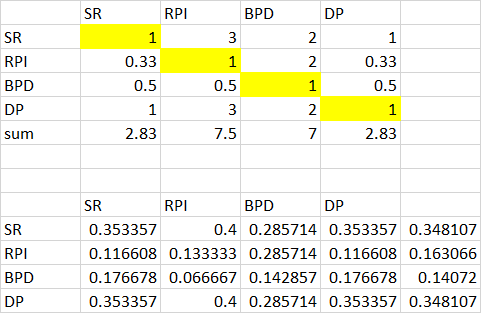

In [606]:
wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.35, 0.16, 0.14, 0.35

In [607]:
#step1: square of all values
def getResult(df):
    df['calc_SR'] = df['SR'].apply(lambda x: x*x) 
    df['calc_RPI'] = df['RPI'].apply(lambda x: x*x) 
    df['calc_BPD'] = df['BPD'].apply(lambda x: x*x) 
    df['calc_dot_percentage'] = df['DP'].apply(lambda x: x*x)

    sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_dot_percentage']].sum(axis = 0))

    df['calc_SR'] = df['calc_SR'].apply(lambda x: x/sq_sr) 
    df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x/sq_rpi) 
    df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x/sq_bpd) 
    df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x/sq_dot_percentage)

    df['calc_SR'] = df['calc_SR'].apply(lambda x: x*wt_sr) 
    df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x*wt_rpi) 
    df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x*wt_bpd) 
    df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x*wt_dot_percentage)

    best_sr, worst_sr = max(df['calc_SR']), min(df['calc_SR'])
    best_rpi, worst_rpi = max(df['calc_RPI']), min(df['calc_RPI'])
    best_bpd, worst_bpd = max(df['calc_BPD']), min(df['calc_BPD'])
    best_dot_percentage, worst_dot_percentage = min(df['calc_dot_percentage']), max(df['calc_dot_percentage'])
    
    return df


In [608]:
def BestAndWorst(df):
    df['dev_best_SR'] = df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr)) 
    df['dev_best_RPI'] = df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi)) 
    df['dev_best_BPD'] = df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd)) 
    df['dev_best_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))

    df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1) 

    df['dev_worst_SR'] = df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr)) 
    df['dev_worst_RPI'] = df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi)) 
    df['dev_worst_BPD'] = df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd)) 
    df['dev_worst_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))

    df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1) 
    
    return df
    



In [609]:
OtherPlayers_filtered= getResult(OtherPlayers_filtered)
OtherPlayers_filtered= BestAndWorst(OtherPlayers_filtered)

In [610]:
OtherPlayers_filtered['score'] = OtherPlayers_filtered.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [611]:
OtherPlayers_filtered[['batsman', 'score']].head()

,batsman,score
5,AB de Villiers,0.677808
15,AT Rayudu,0.052931
32,DA Miller,0.203445
33,DA Warner,0.214905
52,IK Pathan,0.017374


In [612]:
OtherPlayers_filtered[[ 'batsman','Innings', 'runs', 'balls', 'dismmisals', 'DP','SR','BPD', 'score']].sort_values(['score'], ascending = False).reset_index(drop = True).head(25)

,batsman,Innings,runs,balls,dismmisals,DP,SR,BPD,score
0,SR Watson,4,121,70,2,22.857143,172.857143,35.000000,0.902900
1,AB de Villiers,5,92,68,2,30.882353,135.294118,34.000000,0.677808
2,V Kohli,7,175,150,4,33.333333,116.666667,37.500000,0.345022
3,Yuvraj Singh,4,66,58,2,37.931034,113.793103,29.000000,0.236698
4,MK Pandey,4,58,51,3,37.254902,113.725490,17.000000,0.226955
5,DA Warner,4,104,96,3,33.333333,108.333333,32.000000,0.214905
6,DA Miller,4,42,39,2,28.205128,107.692308,19.500000,0.203445
7,R Dravid,4,79,74,2,36.486486,106.756757,37.000000,0.172707
8,JH Kallis,5,124,124,3,31.451613,100.000000,41.333333,0.157971
9,RG Sharma,5,67,61,3,40.983607,109.836066,20.333333,0.157211


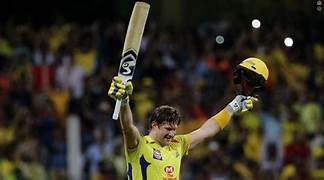

Observation: 

1) Shane watson's record is against CSK in middle with attack and less dot percentage. which shows why CSK went for Shane     Watson in IPL 2018 mega auction.

2) AB devillers always been great middle order batter with good SR and less dot percentage.

3) V kohli also made into the list but issue was only SR and which doesn't matter but achoring role is given to VK.


# Now Let's compare how CSK players played in middle overs for CSK 
## and also check where Shivam Dube stands in that list

In [613]:
def byCustomCSk(df, current_venue, current_phase, current_team):
    df=df[df.venue==current_venue]
    df=df[df.phase==current_phase]

    df=df[df.batting_team==current_team]


    df.reset_index(inplace=True, drop=True)
    
    df['isDot']=df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
    df['isOne']=df['batsman_runs'].apply(lambda x: 1 if x==1 else 0)
    df['isTwo']=df['batsman_runs'].apply(lambda x: 1 if x==2 else 0)
    df['isThree']=df['batsman_runs'].apply(lambda x: 1 if x==3 else 0)
    df['isFour']=df['batsman_runs'].apply(lambda x: 1 if x==4 else 0)
    df['isSix']=df['batsman_runs'].apply(lambda x: 1 if x==6 else 0)
    
    runs =pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns={'batsman_runs':'runs'})
    balls= pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns={'match_id': 'balls'})
    innings= pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id':'Innings'})
    dismmisals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={"player_dismissed": "dismmisals"})
    fours=pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns={'isFour':"fours"})
    sixes=pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns={'isSix':"sixes"})
    dots=pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns={'isDot':"dots"})
    
    df= pd.merge(innings, runs, on='batsman').merge(balls, on='batsman').merge(dismmisals, on='batsman').merge(fours, on='batsman').merge(sixes, on='batsman').merge(dots, on='batsman')
    print(df.head(10))
    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
    df['DP'] = df.apply(lambda x: 100*x['dots']/x['balls'], axis = 1)
    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['Innings'], axis = 1)
    df['BPD']=df.apply(lambda x: balls_per_dismissal(x['balls'],x['dismmisals']), axis=1)
    df['BPB']=df.apply(lambda x: balls_per_boundary(x['balls'],x['sixes']+x['fours']), axis=1)

    return df

In [614]:
CSKPlayers =byCustomCSk(comb, "MA Chidambaram Stadium","Middle","Chennai Super Kings")

        batsman  Innings  runs  balls  dismmisals  fours  sixes  dots
0  AM Rahane     6        71    62     6           2      2      15  
1  AT Rayudu     12       129   136    6           9      3      56  
2  BA Stokes     1        1     3      0           0      0      2   
3  BB McCullum   3        145   91     2           14     9      38  
4  DJ Bravo      10       74    90     4           8      0      43  
5  DP Conway     7        183   138    4           17     3      34  
6  DR Shorey     1        5     11     1           0      0      6   
7  DR Smith      4        35    30     2           3      1      10  
8  F du Plessis  12       300   267    6           7      12     76  
9  JA Morkel     11       134   103    3           9      6      36  


In [615]:
CSKPlayers['batsman'].unique()

array(['AM Rahane', 'AT Rayudu', 'BA Stokes', 'BB McCullum', 'DJ Bravo',
       'DP Conway', 'DR Shorey', 'DR Smith', 'F du Plessis', 'JA Morkel',
       'JM Kemp', 'Joginder Sharma', 'KM Jadhav', 'L Balaji', 'M Vijay',
       'MEK Hussey', 'MJ Santner', 'ML Hayden', 'MM Ali', 'MS Dhoni',
       'PA Patel', 'R Ashwin', 'RA Jadeja', 'RD Gaikwad', 'S Anirudha',
       'S Badrinath', 'S Dube', 'S Vidyut', 'SK Raina', 'SP Fleming',
       'SR Watson', 'SW Billings', 'WP Saha'], dtype=object)

In [616]:
CSKPlayers = CSKPlayers[CSKPlayers.Innings >= 4 ]


In [617]:
wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.35, 0.16, 0.14, 0.35


In [618]:
CSKPlayers= getResult(CSKPlayers)
CSKPlayers= BestAndWorst(CSKPlayers)

In [619]:
CSKPlayers['score'] = CSKPlayers.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [620]:
CSKPlayers[['batsman', 'score']].head()

,batsman,score
0,AM Rahane,0.215440
1,AT Rayudu,0.024740
4,DJ Bravo,0.001607
5,DP Conway,0.521359
7,DR Smith,0.186318


In [621]:
CSKPlayers[[ 'batsman','Innings', 'runs', 'balls', 'dismmisals', 'DP','SR', 'score']].sort_values(['score'], ascending = False).reset_index(drop = True).head(25)

,batsman,Innings,runs,balls,dismmisals,DP,SR,score
0,M Vijay,17,366,246,11,33.739837,148.780488,0.715612
1,DP Conway,7,183,138,4,24.637681,132.608696,0.521359
2,ML Hayden,5,101,76,3,25.000000,132.894737,0.487804
3,S Dube,7,122,91,5,39.560440,134.065934,0.418335
4,JA Morkel,11,134,103,3,34.951456,130.097087,0.390229
5,MEK Hussey,17,372,299,11,26.421405,124.414716,0.350481
6,SK Raina,42,856,693,31,32.034632,123.520924,0.297424
7,MS Dhoni,39,551,491,7,35.030550,112.219959,0.273251
8,F du Plessis,12,300,267,6,28.464419,112.359551,0.223746
9,AM Rahane,6,71,62,6,24.193548,114.516129,0.215440


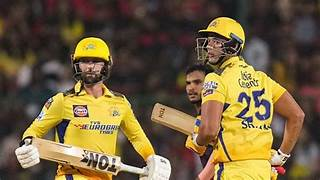

Observation :

   Shivam Dube almost justify his role for CSK in middle phase of the inning.
    
   His Dot percentage is high but at the same time his Strike rate justify his role and he made quite good impact for CSK in middle phase.
    
   Another observation Deven Conway also has significant impact with rotating the strike in middle phase with good SR.